<a href="https://colab.research.google.com/github/HKang42/DS-Unit-2-Kaggle-Challenge/blob/master/module4-classification-metrics/Harrison_Kang_LS_DS_224_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 4*

---

# Classification Metrics

## Assignment
- [ ] If you haven't yet, [review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Plot a confusion matrix for your Tanzania Waterpumps model.
- [ ] Continue to participate in our Kaggle challenge. Every student should have made at least one submission that scores at least 70% accuracy (well above the majority class baseline).
- [ ] Submit your final predictions to our Kaggle competition. Optionally, go to **My Submissions**, and _"you may select up to 1 submission to be used to count towards your final leaderboard score."_
- [ ] Commit your notebook to your fork of the GitHub repo.
- [ ] Read [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), by Lambda DS3 student Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.


## Stretch Goals

### Reading

- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)


### Doing
- [ ] Share visualizations in our Slack channel!
- [ ] RandomizedSearchCV / GridSearchCV, for model selection. (See module 3 assignment notebook)
- [ ] Stacking Ensemble. (See module 3 assignment notebook)
- [ ] More Categorical Encoding. (See module 2 assignment notebook)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

# code from previous assignments

In [0]:
import numpy as np
import datetime as dt

def wrangler(df):
  
  df = df.copy()

  # fix latitude 
  df['latitude'] = df['latitude'].replace(-2e-08, 0)

  # replace zeroes with NaN's for appropriate columns
  zero_cols = ['longitude', 'latitude', 'gps_height', 'population', 'construction_year']

  for col in zero_cols:
    df[col] = df[col].replace(0, np.NaN)

  # drop duplicate columns
  df = df.drop(columns = ['quantity_group', 'payment_type'])

  # drop columns with useless information
  df = df.drop(columns = ['id','recorded_by'])

  # convert date_recorded to datetime
  df['date_recorded'] = pd.to_datetime (df['date_recorded'], infer_datetime_format=True)

  # replace date_recorded with an ordinal version
  # trying to use non-ordinal date-time will raise an invalid promotion error for
  # the random forest classifier
  df['date_recorded_ord'] = df['date_recorded'].apply(dt.datetime.toordinal)
  df = df.drop(columns = ['date_recorded'])

  return df

In [0]:
# re-initialize the train and test data sets so we don't get errors if we need to re-run
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')

# apply function to our data sets
train = wrangler(train)
test = wrangler(test)

In [0]:
# set target and features

target = 'status_group'
features = train.columns.drop([target])

xtrain = train[features]
ytrain = train[target]

In [0]:
#let's do train/validation split and feature/target split

from sklearn.model_selection import train_test_split

train, val = train_test_split(train, train_size = 0.8, test_size = 0.2, stratify=train['status_group'], random_state=42)

target = 'status_group'

xtrain = train.drop(columns=target)
ytrain = train[target]

xval = val.drop(columns=target)
yval = val[target]

In [0]:
# Build model

import category_encoders as ce
import numpy as np

#from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(ce.OrdinalEncoder(), \
                         SimpleImputer(), \
                         RandomForestClassifier( random_state=42, n_jobs=-1) )

In [9]:
pipeline.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['funder', 'installer', 'wpt_name',
                                      'basin', 'subvillage', 'region', 'lga',
                                      'ward', 'public_meeting',
                                      'scheme_management', 'scheme_name',
                                      'permit', 'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'water_quality', 'quality_group',
                                      'quantit...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                               

 # Plot a confusion matrix for your Tanzania Waterpumps model.

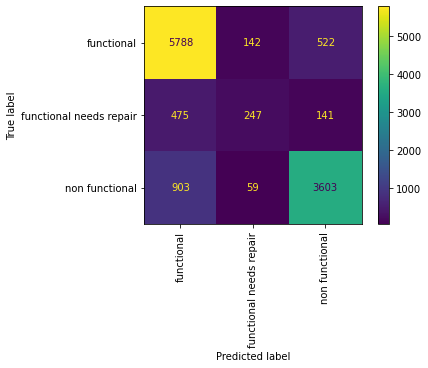

In [10]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, xval, yval, values_format='.0f', xticks_rotation='vertical')

# Ignore stuff below. Just messing around.

# Let's try using ridge regression

We will drop high cardinality columns

Ordinally encode our ytrain and yval

then fit the model and see how it does

In [0]:
# this category showed up as object when it should be a boolean
xtrain['public_meeting'] = xtrain['public_meeting'].astype(bool)

In [0]:
# Let's filter our DF for categorical columns. Then get a list of those columns

categoricals = xtrain.select_dtypes(include = 'object')
cat_list = categoricals.columns

In [45]:
# let's see which categorical columns have high cardinality
for col in cat_list:
  print( "{:<21}{:>7}".format(col , categoricals[col].nunique() ))
  #print(col , categoricals[col].nunique())

funder                  1716
installer               1929
wpt_name               30661
basin                      9
subvillage             17231
region                    21
lga                      124
ward                    2082
scheme_management         12
scheme_name             2563
permit                     2
extraction_type           18
extraction_type_group     13
extraction_type_class      7
management                12
management_group           5
payment                    7
water_quality              8
quality_group              6
quantity                   5
source                    10
source_type                7
source_class               3
waterpoint_type            7
waterpoint_type_group      6


In [86]:
# let's drop any column with more than 5 values (arbitrary cutoff)
low_card = []

# loop through every categorical column
for col in cat_list:
  # get the number of unique values for that column
  uniques = categoricals[col].nunique()

  # append to our list if it's a low number of columns
  if uniques <= 10:
    low_card.append(col)

  else:
    pass

low_card

['basin',
 'permit',
 'extraction_type_class',
 'management_group',
 'payment',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [87]:
# create function that let's us ordinally encode y value dataframes (ytrain, yval, and ytest)
def ordinal_status_group(y_df):
  encoded = y_df.copy()
  encoded = encoded.replace({ 'functional':2, 'functional needs repair':1, 'non functional':0})
  return encoded


# encode our training set
ridge_ytrain = ordinal_status_group(ytrain)
ridge_ytrain.head()

43360    2
7263     2
2486     2
313      0
52726    2
Name: status_group, dtype: int64

In [88]:
# let's get the features we're going to use (non-categoricals + low cardinality categoricals)

features = list( xtrain.select_dtypes(exclude='object').columns ) + low_card
features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'public_meeting',
 'construction_year',
 'date_recorded_ord',
 'basin',
 'permit',
 'extraction_type_class',
 'management_group',
 'payment',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [0]:
# create pipeline

import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

ridge_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    SelectKBest(f_regression), 
    Ridge() )

In [90]:
# fit our model
ridge_pipeline.fit(xtrain[features],ridge_ytrain)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'permit', 'extraction_type_class',
                                     'management_group', 'payment',
                                     'water_quality', 'quality_group',
                                     'quantity', 'source', 'source_type',
                                     'source_class', 'waterpoint_type',
                                     'waterpoint_type_group'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_n...
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('selectkbest',
                 SelectKBest(k=10,
                             scor

In [91]:
# let's check what our predictions look like

ridge_pipeline.predict(xval[features])

array([1.0803998 , 0.86158715, 1.75728958, ..., 1.26964569, 1.29605652,
       0.54064996])

In [92]:
# let's round them to the nearest integer
prediction = ridge_pipeline.predict(xval[features])

prediction.round()

array([1., 1., 2., ..., 1., 1., 1.])

In [0]:
# get our encoded version of the validation set
ridge_yval = ordinal_status_group(yval)

In [94]:
# Now we can calculate accuracy
from sklearn.metrics import accuracy_score

accuracy_score(prediction.round(), ridge_yval)

0.3547138047138047

In [60]:
# To get this and other out of the box tools to work, I'd need a way to do the ordinal encoding and decoding inside the pipeline for the target dataframe.
# this would probably writing a new class just for the encoder.

plot_confusion_matrix(ridge_pipeline, xval[features], ridge_yval, values_format='.0f', xticks_rotation='vertical')

ValueError: ignored

# Let's see what happens if we use logistic regression

In [0]:
# Build model

import category_encoders as ce
import numpy as np

#from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

logistic_pipeline = make_pipeline(ce.OrdinalEncoder(), \
                         SimpleImputer(), \
                         LogisticRegression(solver='lbfgs' , max_iter=1000) )

In [64]:
logistic_pipeline.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['funder', 'installer', 'wpt_name',
                                      'basin', 'subvillage', 'region', 'lga',
                                      'ward', 'scheme_management',
                                      'scheme_name', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'water_quality', 'quality_group',
                                      'quantity', 'source', 'sour...
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('logisticregression',
                 Logisti

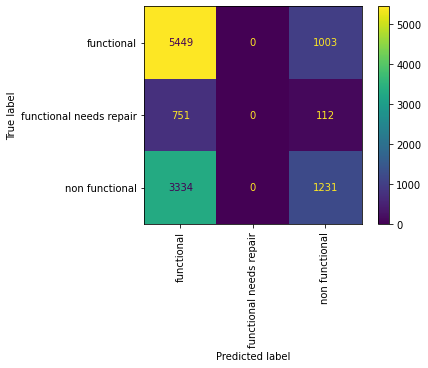

In [65]:
plot_confusion_matrix(logistic_pipeline, xval, yval, values_format='.0f', xticks_rotation='vertical')